In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

**Dataset Description**

**User ID**: Unique identifier for each user.

**Gender**: Categorical feature indicating the user's gender (Male/Female).

**Age**: Numerical feature representing the user's age.

**EstimatedSalary**: Numerical feature representing the user's estimated salary.

**Purchased**: Binary target variable (0/1) indicating whether the user made a purchase (0 = No, 1 = Yes).

In [46]:
# Load dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Display basic info
display(df.head())
display(df.info())
display(df.describe())
df.shape

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


None

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


(400, 5)

In [50]:
# Dummy variable for males
df['Male'] = np.where(df['Gender'] == 'Male', 1, 0)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


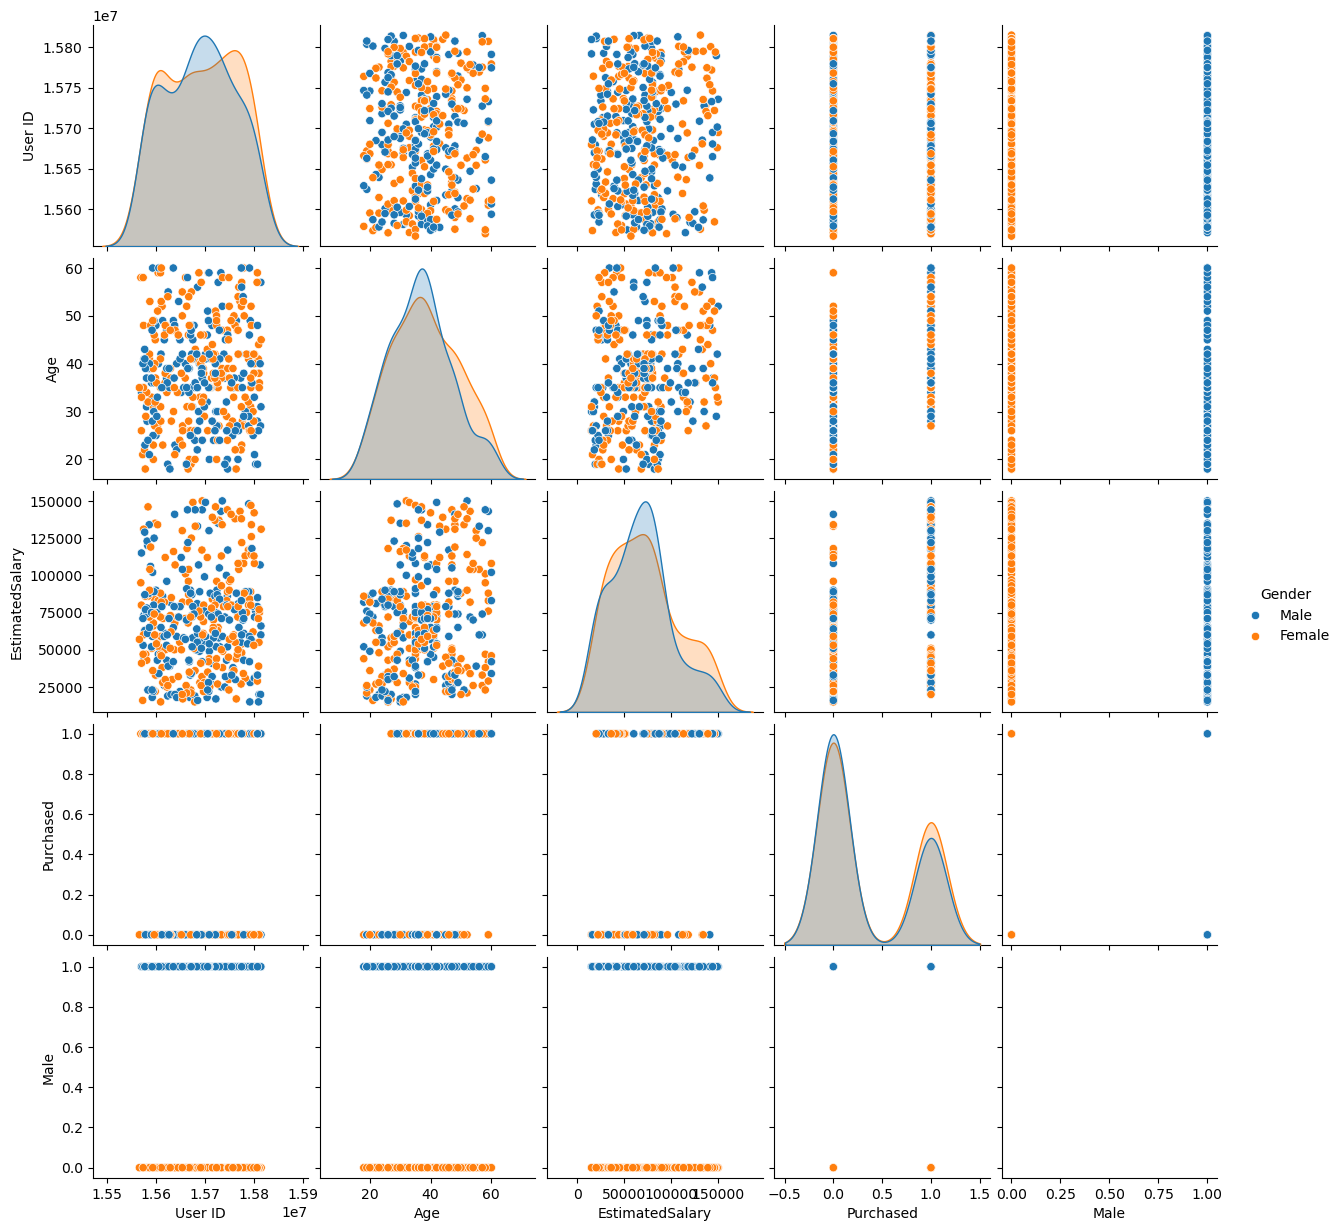

In [58]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df, hue='Gender')
plt.show()

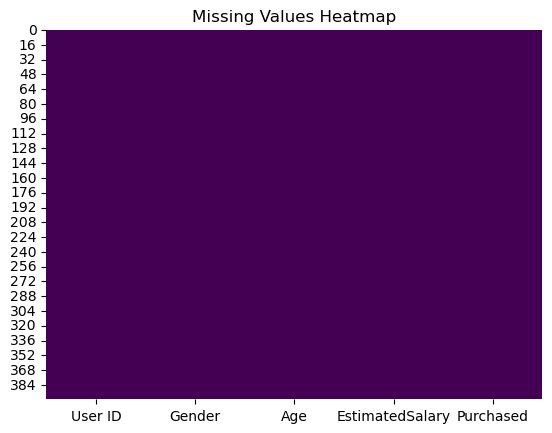

In [11]:
# Checking for missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


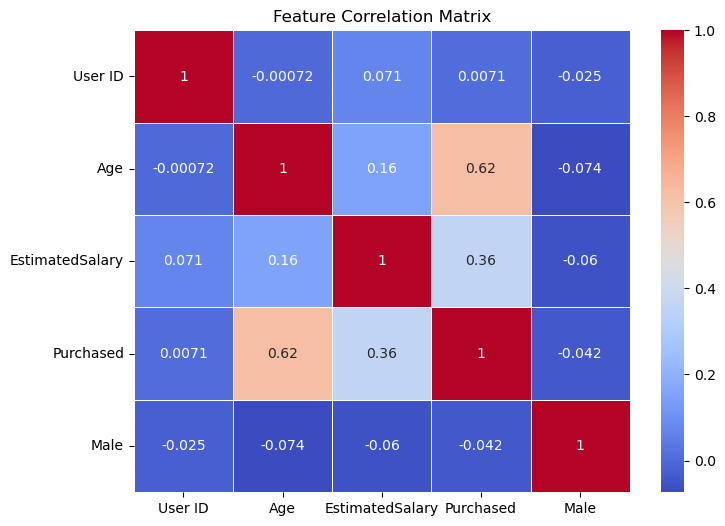

In [98]:
# Correlation matrix
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [100]:
# Selecting features and target
X = df[['Age', 'EstimatedSalary', 'Male']]
y = df['Purchased']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [106]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8875

Confusion Matrix:
 [[50  2]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



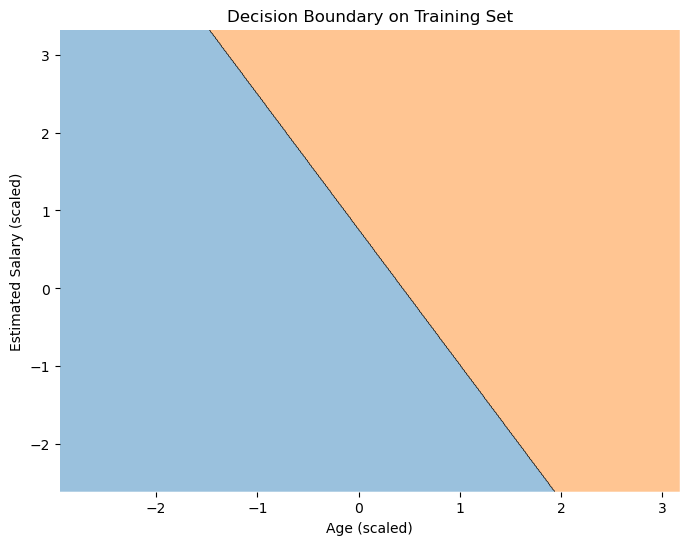

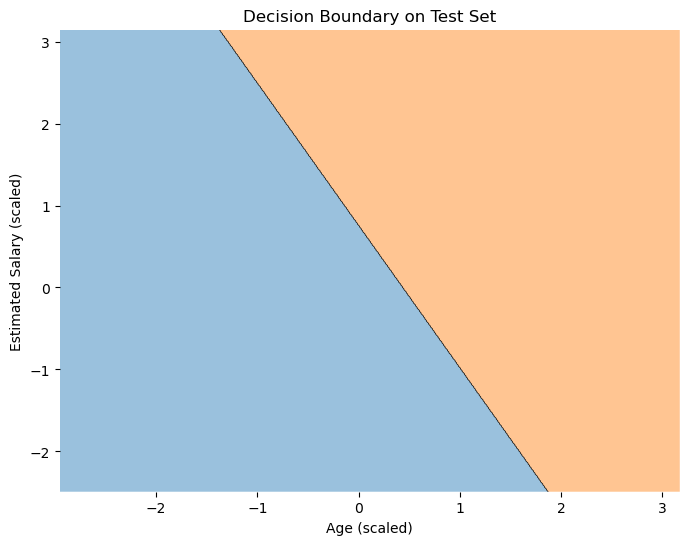

In [119]:
# Visualizing decision boundary
filler_feature_values = {2: 1}
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train.values, clf=model, legend=2, 
                      filler_feature_values=filler_feature_values)
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.title("Decision Boundary on Training Set")
plt.show()

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test.values, clf=model, legend=2,
                      filler_feature_values=filler_feature_values)
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.title("Decision Boundary on Test Set")
plt.show()